# A Scientific (and didatic) Approach to "match" Potential Hiring Profiles to giving Curricula Vitae

### Use case of NLTK, pdfplumb and wordcloud Python Libraries  (for Brazilian Research Financial Teams - English version)

In [47]:
# Tested environment - Ms Windows 10
# Install Anaconda Python (search Google to download and install)
# Create Anaconda virtual (nlp) environment (ex.: conda create nlp)
# and install basic libraries

# !pip install pdfplumber
# !pip install nltk
# !pip install wordcloud
# !pip install pandas

In [48]:
# Import libraries
import pdfplumber
import nltk

In [49]:
# Hook graphics inline execution
%matplotlib inline

In [50]:
# Reading a curriculum with pdfplumb
file_name = 'ARMB1.pdf'
pdfFile = pdfplumber.open(file_name)

In [51]:
# Reading first page (only)
first_page = pdfFile.pages[0]

In [52]:
# Extracting the first page raw text
rawText = first_page.extract_text()

### [ 1 ] First Raw Text View

In [53]:
print(rawText)

ANTONIO ROBERTO MENDES BARBERÁ 
 
Av. Ataulfo de Paiva, 7000/101 • LEBLON • 22440-033 • RIO DE JANEIRO, RJ • BRASIL 
Fixo: (21) 2297-2045 • móvel: (21) 9 9999-9999 • e-mail armb@globo.com 
 
Cientista de Dados (& pesquisador) no Mercado Financeiro 
Profissional de Tecnologia da Informação 
 
PALAVRAS-CHAVE (KEY WORDS) 
 
Ciência / dados / data / redes / neurais / neural / ativos / assets / aprendizado / learning / máquinas / machine / finanças / ux / 
cliente / client /  full / stack / desenvolvimento / development / data / science / network / machine learning / compartilhamento / 
sharing / knowledge / AI / inteligência / artificial / intelligence / fintechs / green / voluntário / voluntariado / volunteer Google / 
Colab / Python / GitHub/ Kaggle / JavaScript / jQuery / Bootstrap / SQL / server / side / network / software / engineer / architect / 
research / pesquisa / AWS / Stanford University / PUC / RJ / BR / Brasil /ação/ ações / adr / algoritmo / apresentação / arrojado / 
banco 

### [ 2 ] How About Metatata

In [54]:
# cv METADATA - Checking metadata form curriculum pdf file (python dict) 
pdfFile.metadata

{'Author': 'R B',
 'Creator': 'Microsoft® Word para Microsoft 365',
 'CreationDate': "D:20210702195937-03'00'",
 'ModDate': "D:20210702195937-03'00'",
 'Producer': 'Microsoft® Word para Microsoft 365'}

### [ 3 ] Looking for Hyperlinks

In [55]:
# cv HYPERLINKS - Verifying if curriculum has links and which links
pdfFile.hyperlinks # returns a python dict

[{'page_number': 1,
  'object_type': 'annot',
  'x0': Decimal('258.010'),
  'y0': Decimal('450.520'),
  'x1': Decimal('420.430'),
  'y1': Decimal('462.730'),
  'doctop': Decimal('379.190'),
  'top': Decimal('379.190'),
  'bottom': Decimal('391.400'),
  'width': Decimal('162.420'),
  'height': Decimal('12.210'),
  'uri': 'https://rbarbera2.wixsite.com/backlog',
  'title': None,
  'contents': None,
  'data': {'Subtype': /'Link',
   'Rect': [258.01, 450.52, 420.43, 462.73],
   'BS': {'W': 0},
   'F': 4,
   'A': {'Type': /'Action',
    'S': /'URI',
    'URI': b'https://rbarbera2.wixsite.com/backlog'},
   'StructParent': 1}},
 {'page_number': 1,
  'object_type': 'annot',
  'x0': Decimal('381.020'),
  'y0': Decimal('365.070'),
  'x1': Decimal('477.220'),
  'y1': Decimal('377.280'),
  'doctop': Decimal('464.640'),
  'top': Decimal('464.640'),
  'bottom': Decimal('476.850'),
  'width': Decimal('96.200'),
  'height': Decimal('12.210'),
  'uri': 'http://www.puc-rio.br/',
  'title': None,
  'cont

### [ 4 ]  Analysing the Punctuation and Other Stop Words

In [56]:
# Visualyzing raw text to see what kind of cleanning will be needed (ex.: eliminate symbols, preposotions, conjuctions, 
# punctuations. slashes, etc.)

print(rawText)

ANTONIO ROBERTO MENDES BARBERÁ 
 
Av. Ataulfo de Paiva, 7000/101 • LEBLON • 22440-033 • RIO DE JANEIRO, RJ • BRASIL 
Fixo: (21) 2297-2045 • móvel: (21) 9 9999-9999 • e-mail armb@globo.com 
 
Cientista de Dados (& pesquisador) no Mercado Financeiro 
Profissional de Tecnologia da Informação 
 
PALAVRAS-CHAVE (KEY WORDS) 
 
Ciência / dados / data / redes / neurais / neural / ativos / assets / aprendizado / learning / máquinas / machine / finanças / ux / 
cliente / client /  full / stack / desenvolvimento / development / data / science / network / machine learning / compartilhamento / 
sharing / knowledge / AI / inteligência / artificial / intelligence / fintechs / green / voluntário / voluntariado / volunteer Google / 
Colab / Python / GitHub/ Kaggle / JavaScript / jQuery / Bootstrap / SQL / server / side / network / software / engineer / architect / 
research / pesquisa / AWS / Stanford University / PUC / RJ / BR / Brasil /ação/ ações / adr / algoritmo / apresentação / arrojado / 
banco 

### [ 5 ]  Preprocessing (and further cleaning) CV Raw Text

In [57]:
# Let's tokenize with punkt
nltk.download('punkt')
word_list = nltk.tokenize.word_tokenize(rawText)
print(word_list)

['ANTONIO', 'ROBERTO', 'MENDES', 'BARBERÁ', 'Av', '.', 'Ataulfo', 'de', 'Paiva', ',', '7000/101', '•', 'LEBLON', '•', '22440-033', '•', 'RIO', 'DE', 'JANEIRO', ',', 'RJ', '•', 'BRASIL', 'Fixo', ':', '(', '21', ')', '2297-2045', '•', 'móvel', ':', '(', '21', ')', '9', '9999-9999', '•', 'e-mail', 'armb', '@', 'globo.com', 'Cientista', 'de', 'Dados', '(', '&', 'pesquisador', ')', 'no', 'Mercado', 'Financeiro', 'Profissional', 'de', 'Tecnologia', 'da', 'Informação', 'PALAVRAS-CHAVE', '(', 'KEY', 'WORDS', ')', 'Ciência', '/', 'dados', '/', 'data', '/', 'redes', '/', 'neurais', '/', 'neural', '/', 'ativos', '/', 'assets', '/', 'aprendizado', '/', 'learning', '/', 'máquinas', '/', 'machine', '/', 'finanças', '/', 'ux', '/', 'cliente', '/', 'client', '/', 'full', '/', 'stack', '/', 'desenvolvimento', '/', 'development', '/', 'data', '/', 'science', '/', 'network', '/', 'machine', 'learning', '/', 'compartilhamento', '/', 'sharing', '/', 'knowledge', '/', 'AI', '/', 'inteligência', '/', 'artifi

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Barbera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### [ 6 ] A Bit of Standardization

In [58]:
# Convert words to lwercase (for uniformization purpose)
word_list = [piece.lower() for piece in word_list] # a list comprehension
print(word_list)

['antonio', 'roberto', 'mendes', 'barberá', 'av', '.', 'ataulfo', 'de', 'paiva', ',', '7000/101', '•', 'leblon', '•', '22440-033', '•', 'rio', 'de', 'janeiro', ',', 'rj', '•', 'brasil', 'fixo', ':', '(', '21', ')', '2297-2045', '•', 'móvel', ':', '(', '21', ')', '9', '9999-9999', '•', 'e-mail', 'armb', '@', 'globo.com', 'cientista', 'de', 'dados', '(', '&', 'pesquisador', ')', 'no', 'mercado', 'financeiro', 'profissional', 'de', 'tecnologia', 'da', 'informação', 'palavras-chave', '(', 'key', 'words', ')', 'ciência', '/', 'dados', '/', 'data', '/', 'redes', '/', 'neurais', '/', 'neural', '/', 'ativos', '/', 'assets', '/', 'aprendizado', '/', 'learning', '/', 'máquinas', '/', 'machine', '/', 'finanças', '/', 'ux', '/', 'cliente', '/', 'client', '/', 'full', '/', 'stack', '/', 'desenvolvimento', '/', 'development', '/', 'data', '/', 'science', '/', 'network', '/', 'machine', 'learning', '/', 'compartilhamento', '/', 'sharing', '/', 'knowledge', '/', 'ai', '/', 'inteligência', '/', 'artifi

### [ 7 ] Creating a Punctuation List (to clean)

In [59]:
# Creating a garbage list to remove non relevant words and separators
garbage = ['(',')',';','[',']',',','.','/','•',':'] # Carefull here. Remove nonsemantic pieces only

In [60]:
# Creating a stop words list from built in portuguese list (articles, prepositions, conjunctions, with no semantic value
nltk.download('stopwords');
stop_words = nltk.corpus.stopwords.words('portuguese') # need to specify language
print(stop_words) # stop_words is a mutable (editable) list

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Barbera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### [ 8 ] Creating the Word List (semi cleaned)

In [61]:
# Creating the word list with no stopwords and punctuations
keywords = [piece for piece in word_list if not piece in stop_words and not piece in garbage] # list comprehension
print(keywords)

['antonio', 'roberto', 'mendes', 'barberá', 'av', 'ataulfo', 'paiva', '7000/101', 'leblon', '22440-033', 'rio', 'janeiro', 'rj', 'brasil', 'fixo', '21', '2297-2045', 'móvel', '21', '9', '9999-9999', 'e-mail', 'armb', '@', 'globo.com', 'cientista', 'dados', '&', 'pesquisador', 'mercado', 'financeiro', 'profissional', 'tecnologia', 'informação', 'palavras-chave', 'key', 'words', 'ciência', 'dados', 'data', 'redes', 'neurais', 'neural', 'ativos', 'assets', 'aprendizado', 'learning', 'máquinas', 'machine', 'finanças', 'ux', 'cliente', 'client', 'full', 'stack', 'desenvolvimento', 'development', 'data', 'science', 'network', 'machine', 'learning', 'compartilhamento', 'sharing', 'knowledge', 'ai', 'inteligência', 'artificial', 'intelligence', 'fintechs', 'green', 'voluntário', 'voluntariado', 'volunteer', 'google', 'colab', 'python', 'github/', 'kaggle', 'javascript', 'jquery', 'bootstrap', 'sql', 'server', 'side', 'network', 'software', 'engineer', 'architect', 'research', 'pesquisa', 'aws'

In [62]:
# Counting keywords
len(keywords)

423

In [63]:
rawText

'ANTONIO ROBERTO MENDES BARBERÁ \n \nAv. Ataulfo de Paiva, 7000/101 • LEBLON • 22440-033 • RIO DE JANEIRO, RJ • BRASIL \nFixo: (21) 2297-2045 • móvel: (21) 9 9999-9999 • e-mail armb@globo.com \n \nCientista de Dados (& pesquisador) no Mercado Financeiro \nProfissional de Tecnologia da Informação \n \nPALAVRAS-CHAVE (KEY WORDS) \n \nCiência / dados / data / redes / neurais / neural / ativos / assets / aprendizado / learning / máquinas / machine / finanças / ux / \ncliente / client /  full / stack / desenvolvimento / development / data / science / network / machine learning / compartilhamento / \nsharing / knowledge / AI / inteligência / artificial / intelligence / fintechs / green / voluntário / voluntariado / volunteer Google / \nColab / Python / GitHub/ Kaggle / JavaScript / jQuery / Bootstrap / SQL / server / side / network / software / engineer / architect / \nresearch / pesquisa / AWS / Stanford University / PUC / RJ / BR / Brasil /ação/ ações / adr / algoritmo / apresentação / arr

### [ 9 ] Enhanced Cleaning

In [64]:
cvText = " ".join(s for s in keywords if not s in garbage)
cvText

'antonio roberto mendes barberá av ataulfo paiva 7000/101 leblon 22440-033 rio janeiro rj brasil fixo 21 2297-2045 móvel 21 9 9999-9999 e-mail armb @ globo.com cientista dados & pesquisador mercado financeiro profissional tecnologia informação palavras-chave key words ciência dados data redes neurais neural ativos assets aprendizado learning máquinas machine finanças ux cliente client full stack desenvolvimento development data science network machine learning compartilhamento sharing knowledge ai inteligência artificial intelligence fintechs green voluntário voluntariado volunteer google colab python github/ kaggle javascript jquery bootstrap sql server side network software engineer architect research pesquisa aws stanford university puc rj br brasil /ação/ ações adr algoritmo apresentação arrojado banco bdr bolsa cambial câmbio carteira casado commodities concentração conservador conta coordena corretora cra cri curso digital diligence diversificação disponibilidade dolar due empres

### [ 10 ]  Generating a wordcloud (from CV content)

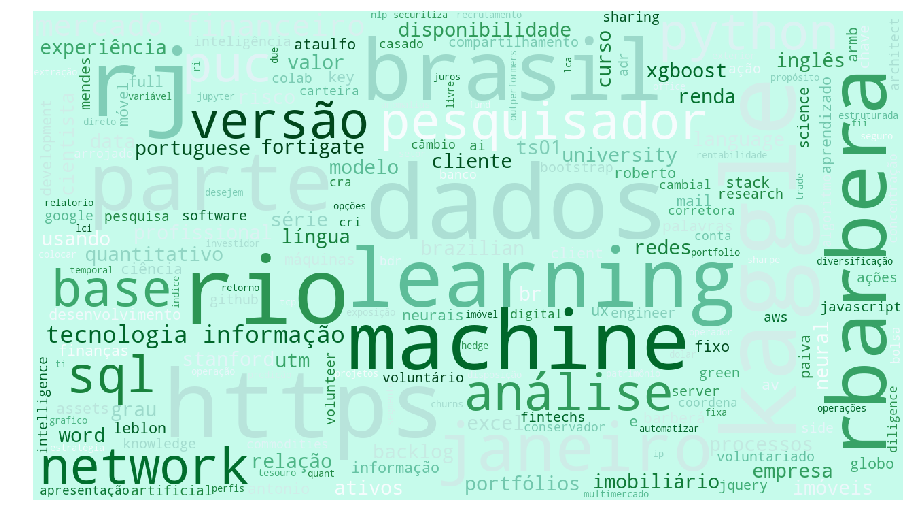

In [65]:
# Generating a wordcloud based on frequency of thr key words
# Colormaps recognized. 
'''
Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, 
Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, 
Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, 
PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, 
RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, 
YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, 
binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, 
gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, 
inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, 
pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, 
summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
terrain, terrain_r, viridis, viridis_r, winter, winter_r
''';

from wordcloud import WordCloud

# Personalized parameters of wordcloud

wordcloud = WordCloud(background_color = '#C6FBEB',
                      max_font_size = 150, 
                      width = 1280, 
                      height = 720, 
                      colormap= 'BuGn').generate(cvText) 

# Showing the finalimage using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 9))
ax.imshow(wordcloud)
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file("wordcloud.png")
plt.show()

### [ 11 ] Joining all pieces in a function named Cloud_Of_Words 

In [66]:
# Cloud_Of_Words performs CV cleaning and returns a wordcloud for the given CV

In [67]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

def Cloud_Of_Words(cv, save = True):
    #  cv: should be the complete path to the cv pdf file 
    
    pdfFile = pdfplumber.open(cv)
    first_Page = pdfFile.pages[0]  # Reads only the first page. CV with more than one page will loose further pages' data.
    rawText = first_Page.extract_text()

    word_list = nltk.tokenize.word_tokenize(rawText)  # transforms raw text in a token list
    word_list = [piece.lower() for piece in word_list]  # lower case all words

    keywords = [piece for piece in word_list if not piece in stop_words and not piece in garbage]  # get rid off all puctuations
    cvText = " ".join(s for s in keywords)  # join all with a space separator 


    wordcloud = WordCloud(background_color = '#C6FBEB',
                      max_font_size = 150, 
                      width = 1280, 
                      height = 720, 
                      colormap= 'BuGn').generate(cvText) 

    # show wordcloud image with matplotlib
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.imshow(wordcloud)
    ax.set_axis_off()
    plt.imshow(wordcloud)

    if save:
        wordcloud.to_file(cv+"_wordcloud.png")

    plt.show()

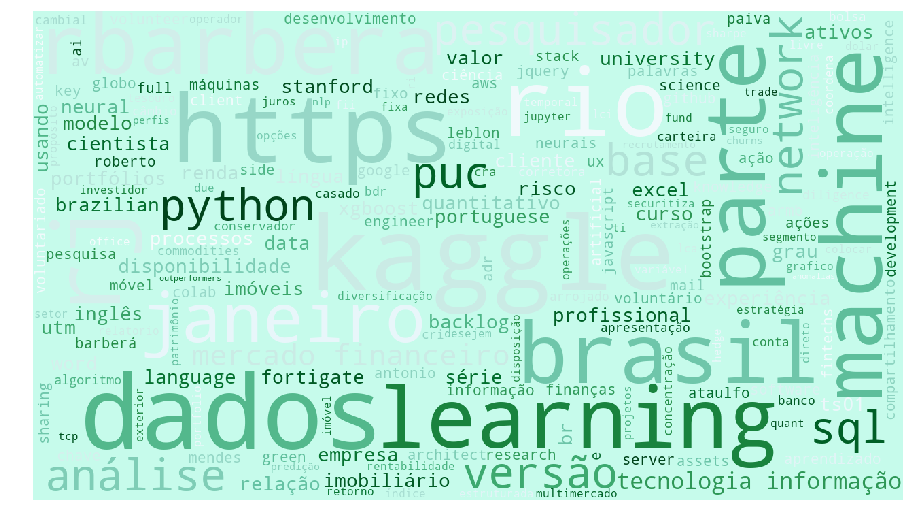

In [68]:
Cloud_Of_Words('ARMB1.pdf')

In [69]:
# Reading the jobs anounced profiles file ('job_profiles.xlsx' - pls see the file to undestand)
import pandas as pd 
jobs = pd.read_excel('job_profiles.xls', sheet_name=None) # old format excel file 

In [70]:
jobs.keys() # returns a python dict where the keys are the Excel worksheets. Each worksheet for each job

dict_keys(['pf-asset-analist', 'pf-client-support', 'pf-sell-side', 'pf-inv-relations'])

In [71]:
# Extracting the quantity of job positions and the jobs descriptions (see the file)
n_jobs = len(jobs.keys())
desc_jobs = list(jobs.keys())

In [72]:
# Transforming data output in a dataframe list (each dataframe corresponding a job position)
jobs = [jobs[desc_jobs[i]] for i in range(n_jobs)]

In [73]:
jobs[0].head()

,keywords,weights
0,ação,3
1,ações,3
2,algoritmos,1
3,análise,3
4,apresentações,3


In [74]:
job1 = jobs[0]
job1.tail()

,keywords,weights
94,valor,2
95,viagens,1
96,word,2
97,yahoo finance,3
98,yfinance,3


In [75]:
key_words = list(job1['keywords'])
print(key_words) # python list

['ação', 'ações', 'algoritmos', 'análise', 'apresentações', 'bancário', 'banco', 'bdr', 'bolsa', 'cambial', 'câmbio', 'carteira', 'casado', 'COE', 'commodities', 'concentração', 'condução própria', 'conta', 'coordena', 'corretora', 'commodities', 'CRA', 'CRI', 'curso', 'debênture', 'digital', 'diligence', 'disponibilidade', 'diversificação', 'dolar', 'due ', 'empresa', 'estratégia', 'estruturada', 'excel', 'exposição', 'exterior', 'fdic', 'fii', 'fundo', 'google docs', 'google finance', 'grafico', 'gráfico', 'hedge', 'imobiliário', 'imóveis', 'imóvel', 'índice de sharpe', 'inglês', 'investidor', 'IP', 'jupyter', 'juros', 'LCA', 'LCI', 'machine learning', 'marcowitz', 'multimercado', 'office', 'opção', 'opções', 'operação', 'operações', 'operador', 'patrimônio', 'portfolio', 'power bi', 'python', 'python', 'quant', 'quantitativo', 'relação', 'relatorio', 'remoto', 'renda fixa', 'renda variável', 'rentabilidade', 'ri', 'risco', 'securitiza', 'PGBL', 'VGBL', 'série', 'setor', 'stocks', 't

In [76]:
# Threshold for frequencies
import numpy as np

threshold = 7 # max frequency per keyword
  
weights = list(job1['weights'])
key_words = list(job1['keywords'])
max_weight = np.sum(np.array(weights) * threshold)
print(max_weight)

1337


In [77]:
# contando as palavras chaves que ocorrem no CV

count_K = [cvText.count(piece) for piece in key_words]
print(count_K)

[19, 2, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 0, 1, 1, 1, 35, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 25, 1, 2, 0, 2, 0, 0]


In [78]:
# To limit the value of a high frequent parameter (limit to threshold)
def lim(x):
    return x if x <= threshold else threshold

count_K = [lim(i) for i in count_K]
print(count_K) # see count_K[0] ajusted from 19 to 7 (threshold)

[7, 2, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 0, 1, 1, 1, 7, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 7, 1, 2, 0, 2, 0, 0]


In [79]:
# score is a weighted mean() of keyword frequencies
score = ((np.array(count_K) * weights).sum()/max_weight).round(4)
print("Decimal Score: ", score)
print("Percentual Score: ", str(round(score, 4)*100)+"%")

Decimal Score:  0.1578
Percentual Score:  15.78%


### [ 12 ] CVs and Jobs matching

In [80]:
stop_words = nltk.corpus.stopwords.words("portuguese")
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [81]:

def Match_Score(cv, job, threshold=7):
    # cv is the complete path and file_name 
    
    pdfFile = pdfplumber.open(cv)
    first_Page = pdfFile.pages[0]  # Reads only the first page. CV with more than one page will loose further pages' data.
    rawText = first_Page.extract_text()

    word_list = nltk.tokenize.word_tokenize(rawText)  # transforms raw text in a token list
    word_list = [piece.lower() for piece in word_list]  # lower case all words

    keywords = [piece for piece in word_list if not piece in stop_words and not piece in garbage]  # get rid off all puctuations
    cvText = " ".join(s for s in keywords)  # join all with a space separator 

    weights = list(job['weights'])
    key_words = list(job['keywords'])

    count_K = [cvText.count(piece) for piece in key_words]  # counts how many times each job term is found in cvText

    def lim (x, threshold):
        return x if x <= threshold else threshold

    count_K = [lim(i, threshold) for i in count_K]   # limit frequencies to threshold

    w_Max = np.sum(np.array(weights) * threshold) 

    score = ((np.array(count_K) * weights).sum()/w_Max).round(4)

    return score

In [82]:
# Testing function with vc ARMB2.pdf)
print(Match_Score('ARMB2.pdf', jobs[0], 5), Match_Score('ARMB2.pdf', jobs[1], 5), Match_Score('ARMB2.pdf', jobs[2], 5), Match_Score('ARMB2.pdf', jobs[3], 5))

0.0974 0.096 0.0857 0.1042


In [83]:
print(Match_Score('ARMB1.pdf', jobs[0], 5), Match_Score('ARMB1.pdf', jobs[1], 5), Match_Score('ARMB1.pdf', jobs[2], 5), Match_Score('ARMB1.pdf', jobs[3], 5))

0.2084 0.2194 0.201 0.2168


### [ 13 ] - Batch CVs Processing and Sorting by Profile

In [84]:
# Processing a batch of CVs
jobs_list = jobs
cv_list = ['ARMB1.pdf', 'ARMB2.pdf', 'ARMB3.pdf']

In [93]:
print(jobs_list)

[         keywords  weights
0            ação        3
1           ações        3
2      algoritmos        1
3         análise        3
4   apresentações        3
..            ...      ...
94          valor        2
95        viagens        1
96           word        2
97  yahoo finance        3
98       yfinance        3

[99 rows x 2 columns],          keywords  weights
0            ação        3
1           ações        3
2      algoritmos        2
3         análise        1
4   apresentações        2
..            ...      ...
94          valor        3
95        viagens        1
96           word        1
97  yahoo finance        1
98       yfinance        1

[99 rows x 2 columns],          keywords  weights
0            ação        2
1           ações        2
2      algoritmos        2
3         análise        2
4   apresentações        3
..            ...      ...
94          valor        2
95        viagens        3
96          venda        3
97  yahoo finance        1
98    

In [87]:
# Creating a list of lists with the scores of each candidate using Match_Score()
applicators = [[Match_Score(cv, jobs[2]) for jobs[2] in jobs_list] for cv in cv_list]
applicators

[[0.1578, 0.1665, 0.1665, 0.1639],
 [0.0785, 0.0784, 0.0784, 0.0835],
 [0.1399, 0.1469, 0.1469, 0.1684]]

In [88]:
# Filter only the names related to the jobs[2]  "pf-sell-side" profile
names = [cv.split('/')[-1].split('.')[0] for cv in cv_list]

In [89]:
# Matches with jobs[2]
matchs = pd.DataFrame(applicators, columns = desc_jobs, index = names)

In [90]:
# Listing sorted scores for jobs jobs[0] "pf-asset-analist"  profile
matchs.sort_values(by="pf-asset-analist", ascending = False)

,pf-asset-analist,pf-client-support,pf-sell-side,pf-inv-relations
ARMB1,0.1578,0.1665,0.1665,0.1639
ARMB3,0.1399,0.1469,0.1469,0.1684
ARMB2,0.0785,0.0784,0.0784,0.0835


In [91]:
# Listing sorted scores for jobs jobs[1] "pf-asset-analist"  profile
matchs.sort_values(by='pf-client-support', ascending = False)

,pf-asset-analist,pf-client-support,pf-sell-side,pf-inv-relations
ARMB1,0.1578,0.1665,0.1665,0.1639
ARMB3,0.1399,0.1469,0.1469,0.1684
ARMB2,0.0785,0.0784,0.0784,0.0835


In [94]:
# Listing sorted scores for jobs jobs[3] "pf-asset-analist"  profile
matchs.sort_values(by='pf-inv-relations', ascending = False)

,pf-asset-analist,pf-client-support,pf-sell-side,pf-inv-relations
ARMB3,0.1399,0.1469,0.1469,0.1684
ARMB1,0.1578,0.1665,0.1665,0.1639
ARMB2,0.0785,0.0784,0.0784,0.0835


# Conclusion

- NLTK and pdfplumb are two powerful features that are very useful when it comes to handling hundreds, maybe thousands of resumes during the recruiting and selection process, offering the possibility of fully automating the resume separation process, using in "canadas" of Organized filtering. This process saves the selection team's precious time and helps, in particular, in the elimination of curricula that are outside the intended profiles. In this study, for example, ARMB3 would be the most suitable for the position of "Investor Relations Analyst", which is the job that corresponds to the "pf-inv-relations" profile.

#### By Antonio Roberto Mendes Barbera, Rio de Janeiro - Brasil (04/07/2021)
e-mail: roberto.barbera@gmail.com +55 21 992992949